# Import

In [1]:
from emot.emo_unicode import UNICODE_EMOJI  # For emojis
from emot.emo_unicode import EMOTICONS_EMO  # For EMOTICONS
import re
from bs4 import BeautifulSoup
import os
from nltk.corpus import stopwords
import nltk
from autocorrect import Speller
from pyvi import ViTokenizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Processing

In [3]:

# Hàm chuyển đổi emoji và emoticon thành chuỗi mô tả
def converting_emojis(text):
    for x in EMOTICONS_EMO:
        text = text.replace(x, "_".join(EMOTICONS_EMO[x].replace(",", "").replace(":", "").split()))
    for x in UNICODE_EMOJI:
        text = text.replace(x, "_".join(UNICODE_EMOJI[x].replace(",", "").replace(":", "").split()))
    return text

# Hàm xóa các thẻ HTML không cần thiết
def XoaTag(html):
    soup = BeautifulSoup(html, 'html.parser')
    for data in soup(['style', 'script']):
        data.decompose()
    return ' '.join(soup.stripped_strings)

# Đọc stop words tiếng Việt từ file
with open("../Data/vietnamese-stopwords.txt", "r", encoding="utf-8") as f:
    stop_vietnamese = f.read().splitlines()

# Hàm để đọc file với xử lý lỗi mã hóa
def read_file_with_encoding(file_path):
    try:
        # Thử đọc file với mã hóa UTF-8
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except UnicodeDecodeError:
        try:
            # Nếu UTF-8 lỗi, thử UTF-16
            with open(file_path, 'r', encoding='utf-16') as file:
                return file.read()
        except UnicodeDecodeError:
            # Nếu UTF-16 lỗi, thử Latin-1 (ISO-8859-1)
            with open(file_path, 'r', encoding='latin-1') as file:
                return file.read()


# Đường dẫn đến thư mục chứa file đầu vào
dir_path = './Bat-dong-san'

# Duyệt qua tất cả các file trong thư mục Bat-dong-san
for file_name in os.listdir(dir_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(dir_path, file_name)

        # Đọc nội dung file với xử lý mã hóa
        content = read_file_with_encoding(file_path)

        # Xử lý nội dung
        content = content.lower()  # Chuyển về chữ thường
        content = re.sub(r'[^\w\s]', '', content)  # Loại bỏ dấu câu
        content = XoaTag(content)  # Xóa thẻ HTML
        content = re.sub(r'\d+', ' ', content)  # Loại bỏ số
        content = converting_emojis(content)  # Chuyển đổi emoji và emoticon

        # Loại bỏ stop words tiếng Việt
        stopword_removed = " ".join(
            word for word in content.split() if word not in stop_vietnamese
        )
        
        # Tách từ
        tokenized_text = ViTokenizer.tokenize(stopword_removed)

        # Ghi kết quả vào thư mục BTNhom-C3
        output_file_path = f'../BTNhom-C3/Data/{file_name}'
        with open(output_file_path, 'w', encoding='utf-8') as output_file:
            output_file.write(tokenized_text)

# Explore data

In [15]:

data_list = []
# Đường dẫn đến thư mục chứa file đầu vào
dir_path = '../BTNhom-C3/Data'
for file_name in os.listdir(dir_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(dir_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
            data_list.append(data)

[('đất', 1759), ('giá', 863), ('dự_án', 652), ('giấy', 641), ('xây_dựng', 606), ('đầu_tư', 587), ('mua', 510), ('bất_động_sản', 494), ('quyền', 456), ('dân', 448), ('sử_dụng', 433), ('thành_phố', 413), ('hộ', 397), ('khu', 378), ('thị_trường', 358), ('thuê', 318), ('tp', 313), ('triệu', 311), ('ubnd', 301), ('công_ty', 299), ('sở_hữu', 292), ('hiện', 290), ('quy_định', 289), ('chứng', 278), ('luật', 276), ('đồng', 267), ('cư', 264), ('kinh_doanh', 262), ('m', 261), ('hcm', 261), ('sở', 257), ('hà_nội', 246), ('tiền', 244), ('vốn', 241), ('đường', 234), ('chủ', 230), ('thực_hiện', 225), ('thể', 215), ('hồng', 213), ('đấu_giá', 208), ('đất_đai', 200), ('quản_lý', 197), ('đồngm', 197), ('đăng_ký', 197), ('tầng', 195), ('nguyễn', 190), ('đô_thị', 188), ('hàng', 187), ('giao_dịch', 184), ('môi_trường', 184)]


<Axes: xlabel='Samples', ylabel='Counts'>

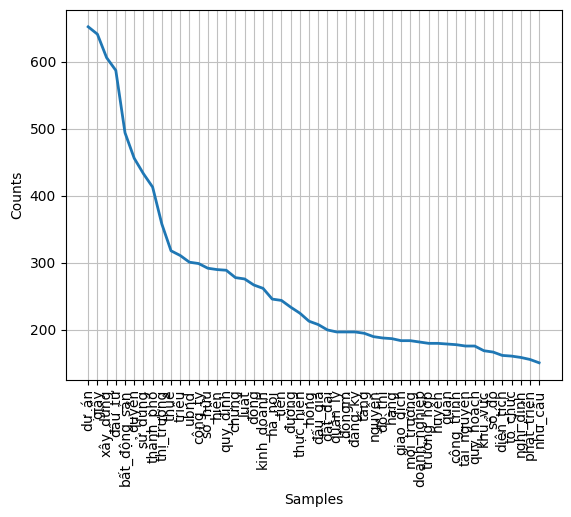

In [16]:
new_data = " ".join(data_list)
# Tokenize dữ liệu
tokens = word_tokenize(new_data)

# Compute the frequency of all words
frequency_dist = FreqDist(tokens)

## show only th top 50 results
print(frequency_dist.most_common(50))


## Consider words with length greater than 3 and plot
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

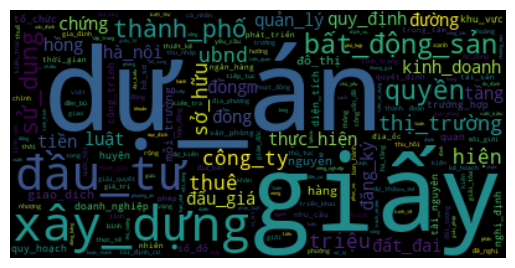

In [17]:
# Wcloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud

plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()